In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/output/diabetes_datathon_newborns_solution.csv
/kaggle/input/womens-health/SampleSubmissionWiDS2021.csv
/kaggle/input/womens-health/DataDictionaryWiDS2021.csv
/kaggle/input/womens-health/UnlabeledWiDS2021.csv/UnlabeledWiDS2021.csv
/kaggle/input/womens-health/TrainingWiDS2021.csv/TrainingWiDS2021.csv


In [19]:
data = pd.read_csv('../input/womens-health/TrainingWiDS2021.csv/TrainingWiDS2021.csv')
data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


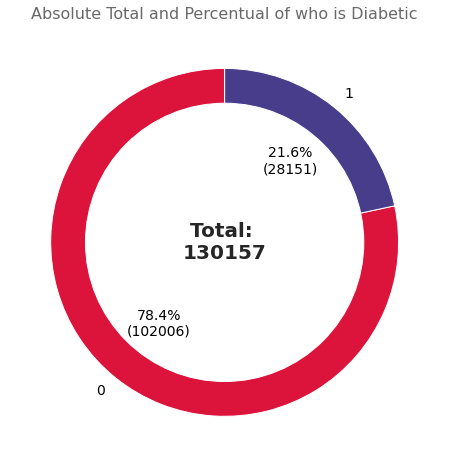

In [21]:
from pycomp.viz.insights import *

diabetes_map = {1 : 'Diabetic', 0 : 'Non Diabetic'}
diabetes_colors = ['crimson', 'darkslateblue']
plot_donut_chart(df = data, col = 'diabetes_mellitus', label_name = diabetes_map, colors = diabetes_colors, 
                 title = 'Absolute Total and Percentual of who is Diabetic') 

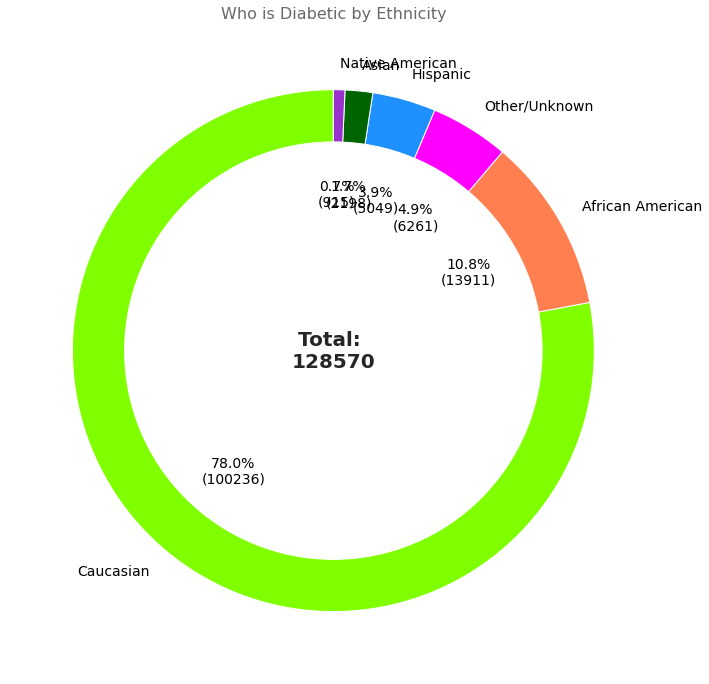

In [22]:
ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid']
plot_donut_chart(df = data, col = 'ethnicity', colors = ethnicity_colors, figsize = (12,12), title = 'Who is Diabetic by Ethnicity')

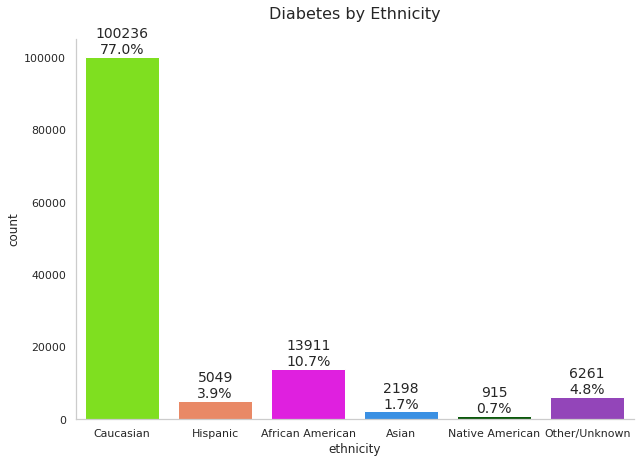

In [23]:
plot_countplot(df = data, col = 'ethnicity', palette = ethnicity_colors, title = 'Diabetes by Ethnicity')

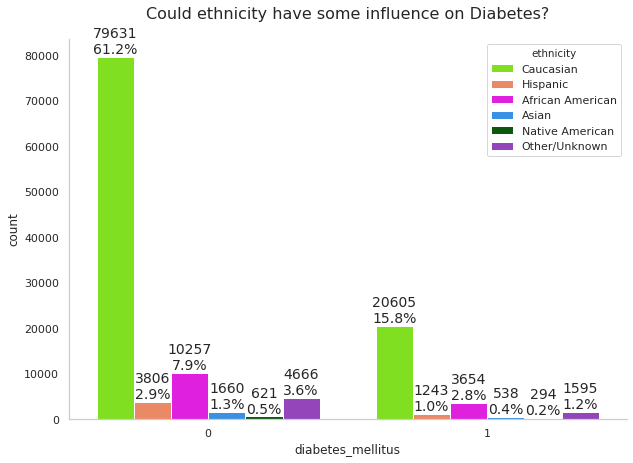

In [24]:
plot_countplot(df = data, col = 'diabetes_mellitus', hue = 'ethnicity', palette = ethnicity_colors, title = "Could ethnicity have some influence on Diabetes?")

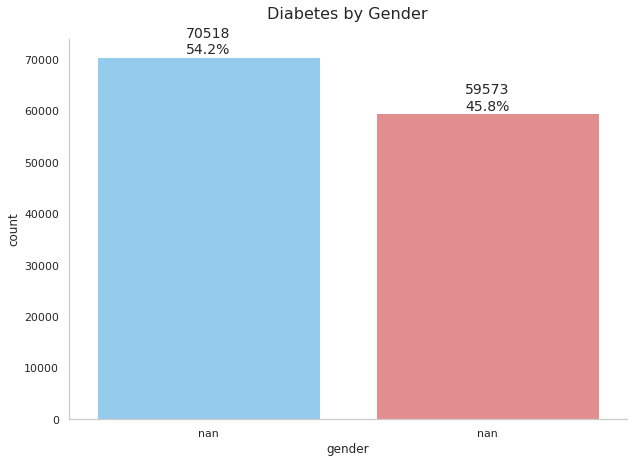

In [25]:
gender_colors = ['lightskyblue', 'lightcoral']
gender_map = {'1': 'M', '0' : 'F'}
plot_countplot(df = data, col = 'gender', palette = gender_colors, label_names = gender_map, title = 'Diabetes by Gender')

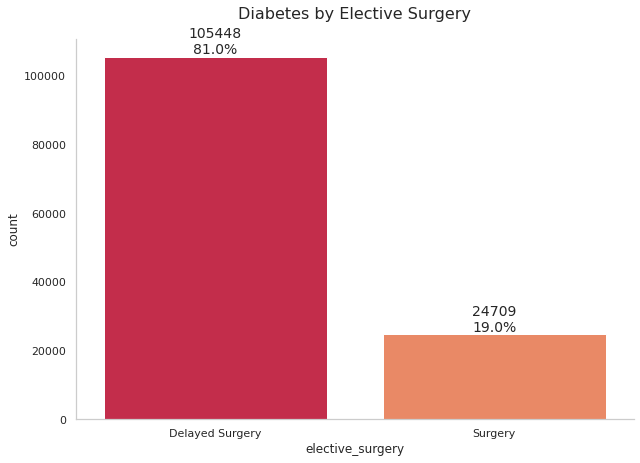

In [26]:
surgery_colors = ['crimson', 'coral']
surgery_map = {'1' : 'Surgery', '0' : 'Delayed Surgery'}
plot_countplot(df = data, col = 'elective_surgery', palette = surgery_colors, label_names = surgery_map, title = 'Diabetes by Elective Surgery')

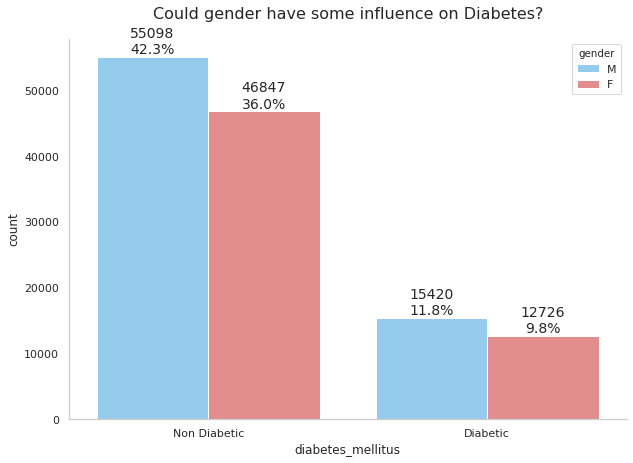

In [27]:
plot_countplot(df = data, col = 'diabetes_mellitus', hue = 'gender', label_names = diabetes_map, palette = gender_colors, title = "Could gender have some influence on Diabetes?")

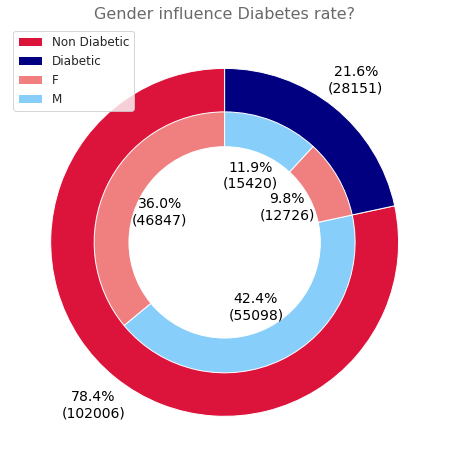

In [28]:
plot_double_donut_chart(df =data, col1 = 'diabetes_mellitus', col2 = 'gender', label_names_col1 = diabetes_map, colors1 = ['crimson', 'navy'], colors2 = ['lightcoral', 'lightskyblue'], title = "Gender influence Diabetes rate?")

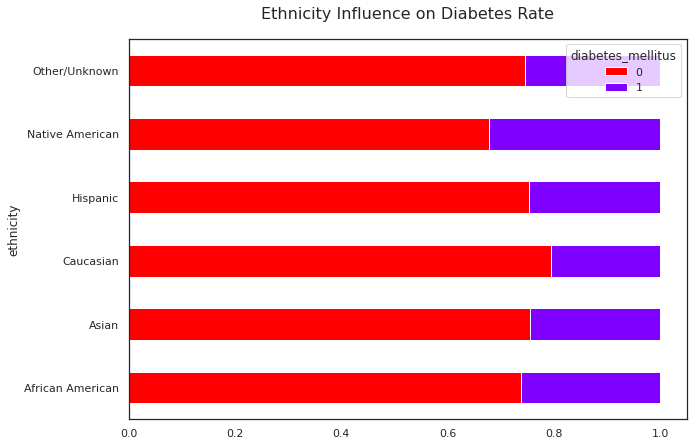

In [29]:
plot_pct_countplot(df=data, col='ethnicity', hue='diabetes_mellitus', palette='rainbow_r',
                   title='Ethnicity Influence on Diabetes Rate')

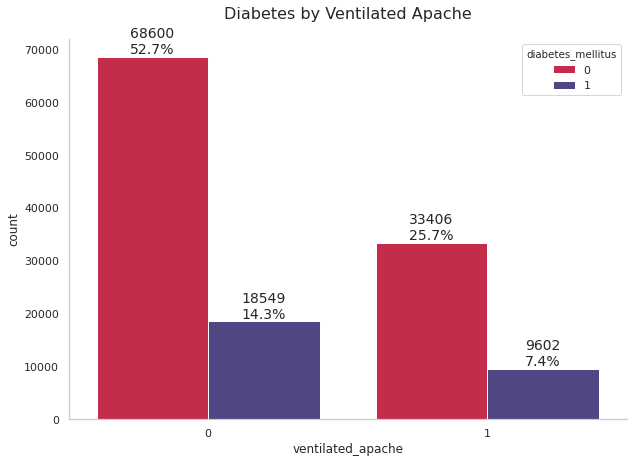

In [30]:
plot_countplot(df = data, col = 'ventilated_apache', hue = 'diabetes_mellitus', orient = 'v', palette = diabetes_colors, title = 'Diabetes by Ventilated Apache')

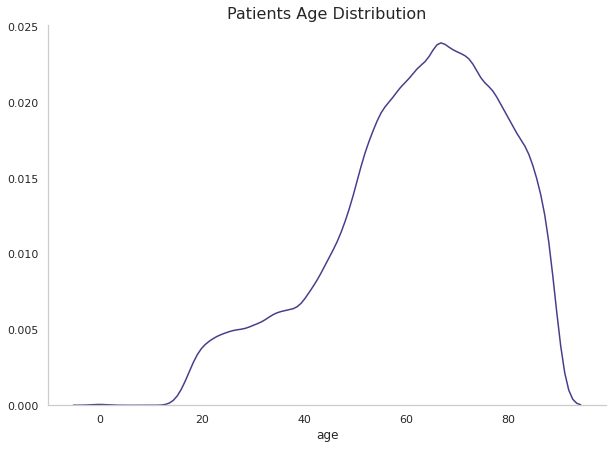

In [31]:
plot_distplot(df = data, col = 'age', title = "Patients Age Distribution")

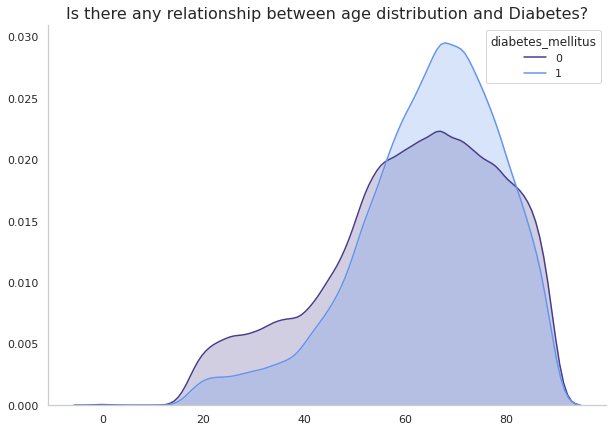

In [32]:
plot_distplot(df = data, col = 'age', hue = 'diabetes_mellitus', kind = 'kde', title = "Is there any relationship between age distribution and Diabetes?")

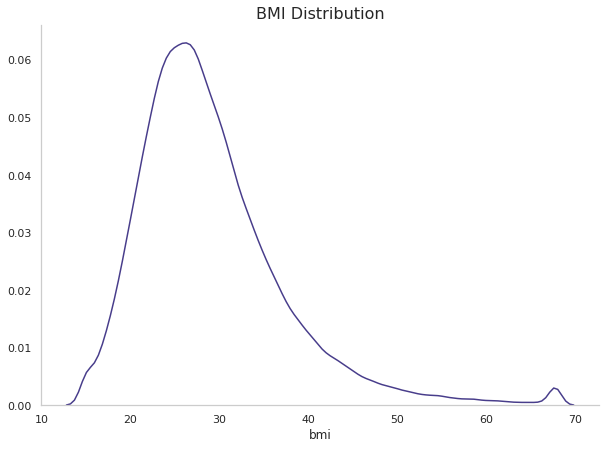

In [33]:
plot_distplot(df=data, col='bmi', title='BMI Distribution')

Erro ao mapear labels na coluna bmi. Exception: 'str' object has no attribute 'keys'


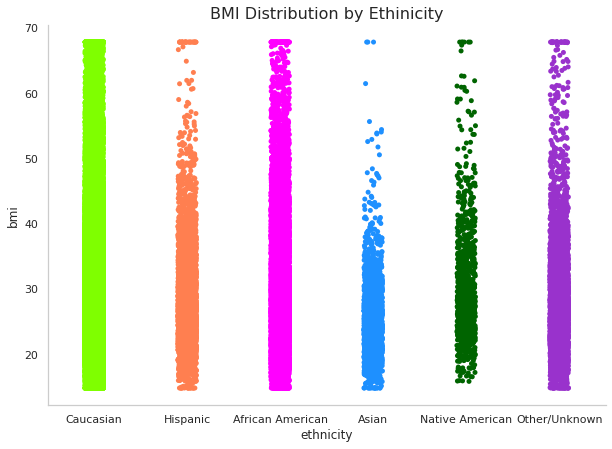

In [34]:
plot_distplot(df=data, col='bmi', hue='ethnicity', kind='strip', label_names='ethnicity',
              palette=['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid'],
              title="BMI Distribution by Ethinicity")

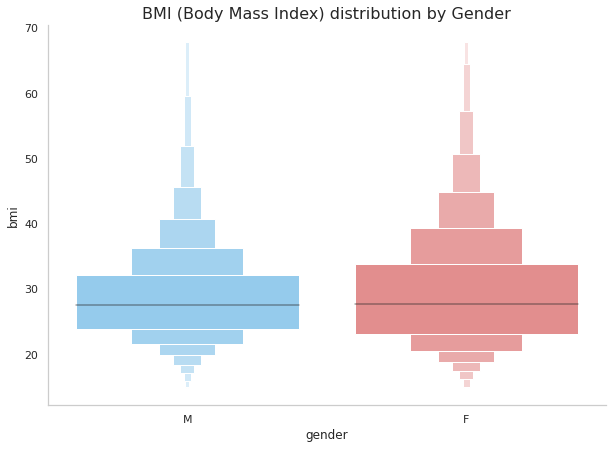

In [35]:
plot_distplot(df=data, col='bmi', hue='gender', kind='boxen', palette=gender_colors,
              title="BMI (Body Mass Index) distribution by Gender")